In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('haberman.csv')
data.head()

,Age,Year,Number of +ve axilliary nodes,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [3]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [5]:
newData = [[2, 1, 0]]
predict = model.predict(newData)
print(predict)


[1]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [6]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(ytest, ypred, labels=[0, 1])
print("Confusion Matrix we want is: \n", conf)

TP = conf[0][0]
TN = conf[1][1]
FP = conf[1][0]
FN = conf[0][1]

print("True Positives", TP)
print("True Negatives", TN)
print("False Positives", FP)
print("False Negatives", FN)


Confusion Matrix we want is: 
 [[ 0  0]
 [ 0 36]]
True Positives 0
True Negatives 36
False Positives 0
False Negatives 0


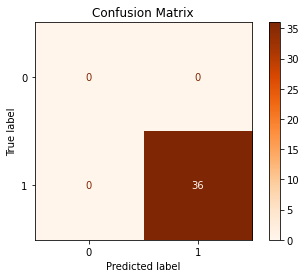

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix")
plt.show()


In [8]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
print(f"Recall Score: {recall_score(ytest, ypred):.3}")
print(f"Specitivity Score: {TN/(TN+FP):.3}")
print(f"Precision Score: {precision_score(ytest, ypred):.3}")
print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
print(f"F1 Score: {f1_score(ytest, ypred):.3}")
print(
    f"Matthews Correlation Coefficient: {matthews_corrcoef(ytest, ypred):.3}")


Recall Score: 0.973
Specitivity Score: 1.0
Precision Score: 0.61
Negative Prediction Value: 1.0
F1 Score: 0.75
Matthews Correlation Coefficient: 0.121


Area under the curve:  0.5264864864864865


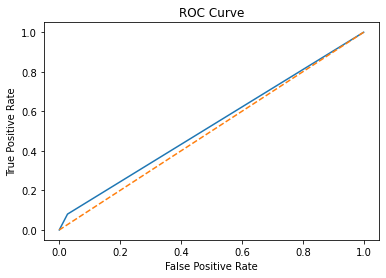

In [16]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(ytest, ypred, pos_label=2)
area = auc(fpr, tpr)
print("Area under the curve: ", area)
plt.plot(fpr, tpr)
plt.plot([1, 0], [1, 0], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
